In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df_train =pd.read_csv(r"D:\Courses\ML Dr Mostafa\Projects_last\1 project-nyc-taxi-trip-duration\split\train.csv")
df_val =pd.read_csv(r"D:\Courses\ML Dr Mostafa\Projects_last\1 project-nyc-taxi-trip-duration\split\val.csv")
df_test=pd.read_csv(r"D:\Courses\ML Dr Mostafa\Projects_last\1 project-nyc-taxi-trip-duration\split\test.csv")
pd.set_option("display.max_columns",50)


In [3]:
df_train.head(3)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2793718,2,2016-06-08 07:36:19,1,-73.985611,40.735943,-73.980331,40.760468,N,1040
1,id3485529,2,2016-04-03 12:58:11,1,-73.978394,40.764351,-73.991623,40.749859,N,827
2,id1816614,2,2016-06-05 02:49:13,5,-73.989059,40.744389,-73.973381,40.748692,N,614


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1000000 non-null  object 
 1   vendor_id           1000000 non-null  int64  
 2   pickup_datetime     1000000 non-null  object 
 3   passenger_count     1000000 non-null  int64  
 4   pickup_longitude    1000000 non-null  float64
 5   pickup_latitude     1000000 non-null  float64
 6   dropoff_longitude   1000000 non-null  float64
 7   dropoff_latitude    1000000 non-null  float64
 8   store_and_fwd_flag  1000000 non-null  object 
 9   trip_duration       1000000 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 76.3+ MB


# 1-so we want to convert pickup_datetime from object to datetime
# 2-extract some features from time like hour ,month and so on 

In [5]:
df_train["pickup_datetime"]=pd.to_datetime(df_train["pickup_datetime"])

In [6]:
df_train["pickup_hour"]=df_train["pickup_datetime"].dt.hour
df_train["pickup_month"]=df_train["pickup_datetime"].dt.month
df_train["pickup_day"]=df_train["pickup_datetime"].dt.day
df_train["pickup_dayofweek"]=df_train["pickup_datetime"].dt.day_name()
df_train["pickup_minute"]=df_train["pickup_datetime"].dt.minute

In [7]:
df_train.columns 

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'pickup_hour', 'pickup_month', 'pickup_day', 'pickup_dayofweek',
       'pickup_minute'],
      dtype='object')

In [9]:
df_train.describe().T

,count,mean,min,25%,50%,75%,max,std
vendor_id,1000000.0,1.534793,1.0,1.0,2.0,2.0,2.0,0.498788
pickup_datetime,1000000,2016-04-01 08:53:15.180106752,2016-01-01 00:00:53,2016-02-17 15:26:08,2016-04-01 15:01:29.500000,2016-05-15 02:35:38.750000128,2016-06-30 23:59:37,NaN
passenger_count,1000000.0,1.665353,0.0,1.0,1.0,2.0,7.0,1.315723
pickup_longitude,1000000.0,-73.973475,-121.933342,-73.991852,-73.981728,-73.967346,-61.335529,0.065404
pickup_latitude,1000000.0,40.750947,34.359695,40.737372,40.754131,40.768379,51.881084,0.033745
dropoff_longitude,1000000.0,-73.973421,-121.933304,-73.991341,-73.979767,-73.963036,-61.335529,0.065432
dropoff_latitude,1000000.0,40.751829,34.359695,40.735928,40.754551,40.769833,43.921028,0.035782
trip_duration,1000000.0,954.884971,1.0,397.0,662.0,1074.0,2227612.0,3882.070116
pickup_hour,1000000.0,13.604165,0.0,9.0,14.0,19.0,23.0,6.400685
pickup_month,1000000.0,3.515209,1.0,2.0,4.0,5.0,6.0,1.681171


# 1-the max of trip_duration is 2227612.0 ,how??
# 2-the min and max for passenger_count are 0 and 7 , how?

In [ ]:
# i will use log for it 
df_train["log_trip_duration"]=np.log1p(df_train["trip_duration"])

In [10]:
print(df_train.isna().sum())
print(df_train.isnull().sum())
print(df_train.duplicated().sum())

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
pickup_hour           0
pickup_month          0
pickup_day            0
pickup_dayofweek      0
pickup_minute         0
dtype: int64
id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
pickup_hour           0
pickup_month          0
pickup_day            0
pickup_dayofweek      0
pickup_minute         0
dtype: int64
0


# let's investigate pickup_datetime

In [11]:
df_train["pickup_datetime"].max()

Timestamp('2016-06-30 23:59:37')

In [12]:
df_train["pickup_datetime"].min()

Timestamp('2016-01-01 00:00:53')

In [13]:
df_train["pickup_datetime"].max()-df_train["pickup_datetime"].min() 

Timedelta('181 days 23:58:44')

# let's investigate passenger_count

In [14]:
df_train["passenger_count"].value_counts()

passenger_count
1    708628
2    143907
5     53635
3     41012
6     33287
4     19491
0        38
7         2
Name: count, dtype: int64

<Axes: xlabel='passenger_count'>

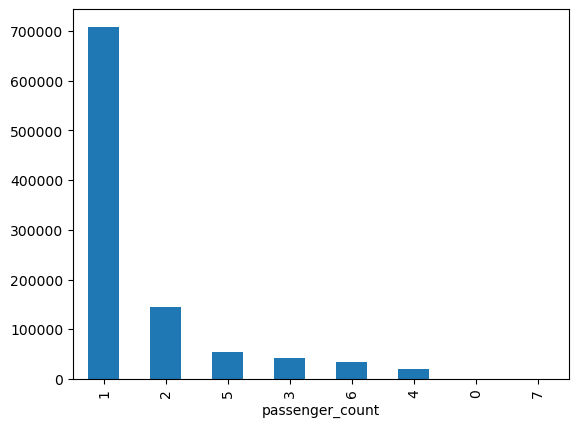

In [15]:
df_train["passenger_count"].value_counts().plot(kind="bar")

In [16]:
gp=df_train.groupby(["passenger_count"])["trip_duration"].sum()
gp

passenger_count
0         7022
1    655497674
2    143410183
3     42253624
4     20539344
5     57516325
6     35660759
7           40
Name: trip_duration, dtype: int64

In [17]:
gp=df_train.groupby(["passenger_count"])["trip_duration"].mean()
gp      # pov : i think taht 7 is outlier but 0 for delivery trips IDK

passenger_count
0     184.789474
1     925.023671
2     996.547652
3    1030.274651
4    1053.786055
5    1072.365526
6    1071.311894
7      20.000000
Name: trip_duration, dtype: float64

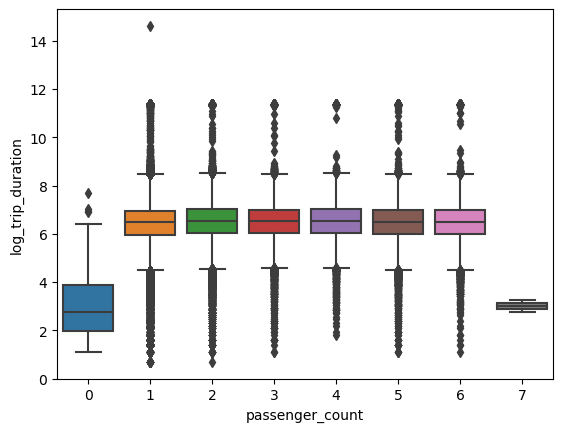

In [34]:
sns.boxplot(data=df_train,x=df_train["passenger_count"],y=df_train["log_trip_duration"])
plt.show()

# let's investigate vendor_id	

In [18]:
df_train["vendor_id"].value_counts()

vendor_id
2    534793
1    465207
Name: count, dtype: int64

<Axes: xlabel='vendor_id'>

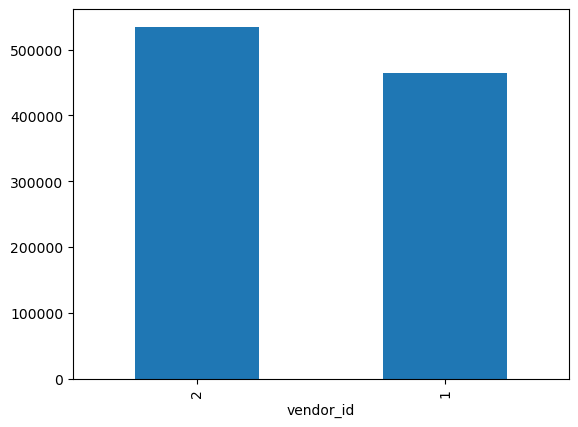

In [19]:
df_train["vendor_id"].value_counts().plot(kind="bar")

In [20]:
gp=df_train.groupby(["vendor_id"])["trip_duration"].sum()
gp

vendor_id
1    388526070
2    566358901
Name: trip_duration, dtype: int64

In [21]:
gp=df_train.groupby(["vendor_id"])["trip_duration"].mean()
gp

vendor_id
1     835.168151
2    1059.024522
Name: trip_duration, dtype: float64

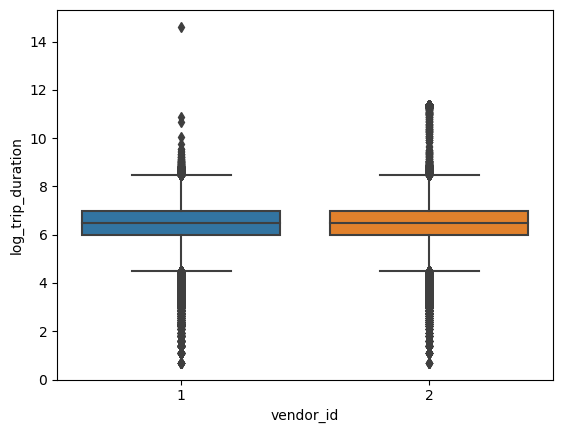

In [33]:
sns.boxplot(data=df_train,x=df_train["vendor_id"],y=df_train["log_trip_duration"])
plt.show()

# let's investigate store_and_fwd_flag

In [22]:
df_train["store_and_fwd_flag"].value_counts()

store_and_fwd_flag
N    994443
Y      5557
Name: count, dtype: int64

<Axes: xlabel='store_and_fwd_flag'>

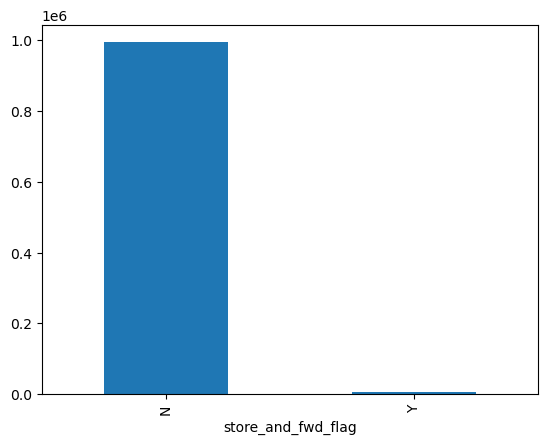

In [23]:
df_train["store_and_fwd_flag"].value_counts().plot(kind="bar")

In [24]:
gp=df_train.groupby(["store_and_fwd_flag"])["trip_duration"].sum()
gp

store_and_fwd_flag
N    948906877
Y      5978094
Name: trip_duration, dtype: int64

In [25]:
gp=df_train.groupby(["store_and_fwd_flag"])["trip_duration"].mean()
gp        # Y trips are longer than N 

store_and_fwd_flag
N     954.209419
Y    1075.777218
Name: trip_duration, dtype: float64

# let's investigate trip_duration


In [27]:
df_train["trip_duration"].value_counts().nlargest(10)

trip_duration
348    1129
424    1125
417    1115
388    1111
386    1103
368    1093
367    1091
358    1091
408    1085
327    1085
Name: count, dtype: int64

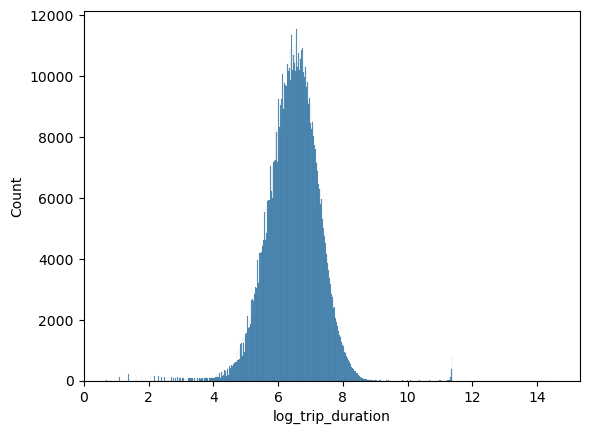

In [28]:
sns.histplot(df_train["log_trip_duration"])
plt.show()

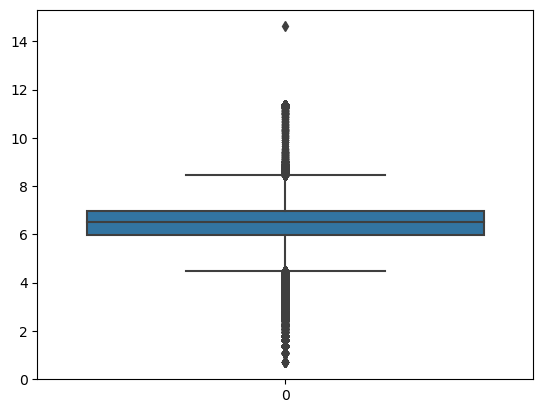

In [30]:
sns.boxplot(df_train["log_trip_duration"])
plt.show()  #see outliers 

# let's investigate some time features 

<Axes: xlabel='pickup_month'>

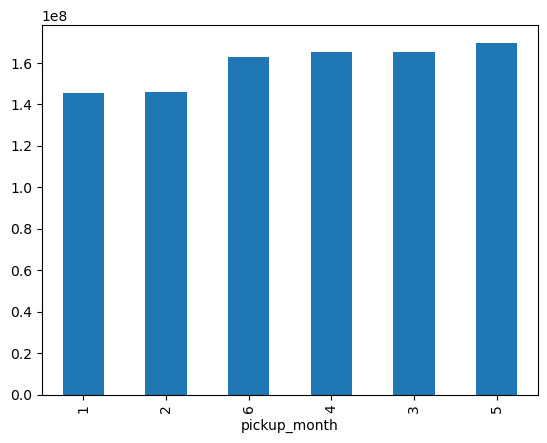

In [41]:
gp=df_train.groupby(["pickup_month"])["trip_duration"].sum()
gp.sort_values().plot(kind="bar")

<Axes: xlabel='pickup_hour'>

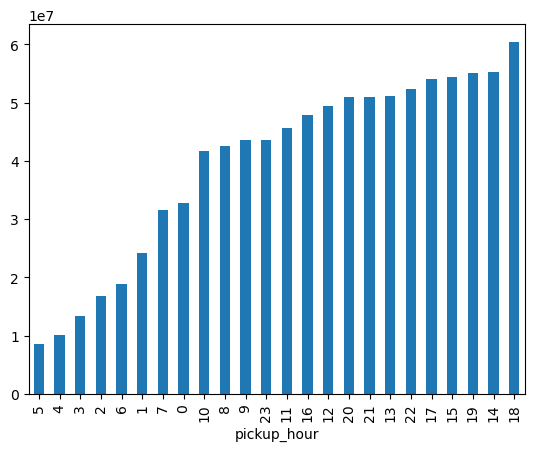

In [40]:
gp=df_train.groupby(["pickup_hour"])["trip_duration"].sum()
gp.sort_values().plot(kind="bar")

In [46]:
df_train["pickup_day"].value_counts()

pickup_day
16    34961
14    34895
12    34452
5     34437
4     33994
6     33979
9     33973
15    33943
13    33864
20    33771
17    33770
19    33697
10    33649
7     33484
11    33436
8     33035
18    33029
21    33001
3     32806
2     32640
26    32592
22    32362
27    32039
29    31988
1     31939
25    31744
28    31334
24    30115
23    28400
30    26861
31    15810
Name: count, dtype: int64

<Axes: xlabel='pickup_day'>

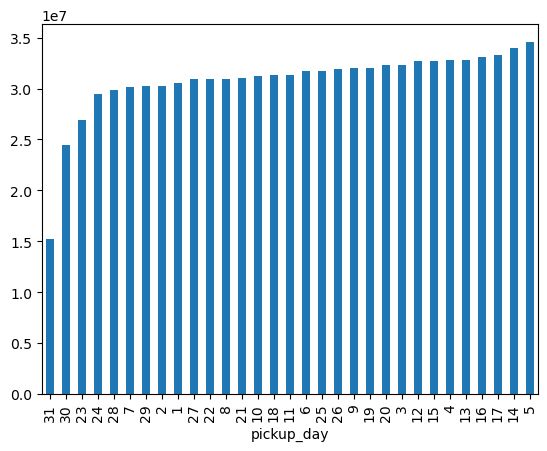

In [43]:
gp=df_train.groupby(["pickup_day"])["trip_duration"].sum()
gp.sort_values().plot(kind="bar")

<Axes: xlabel='pickup_dayofweek'>

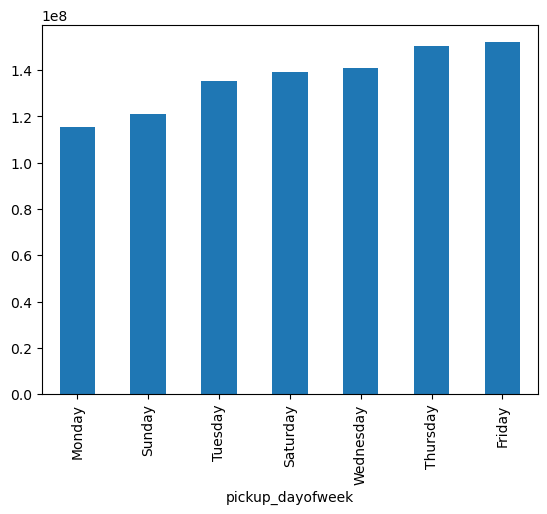

In [52]:
gp=df_train.groupby(["pickup_dayofweek"])["trip_duration"].sum()
gp.sort_values().plot(kind="bar")

In [61]:
df_train["is_weekend"]=((df_train["pickup_dayofweek"]=="Sunday") | (df_train["pickup_dayofweek"]=="Saturday")).astype(int)

In [64]:
df_train["is_weekend"].value_counts()

is_weekend
0    714225
1    285775
Name: count, dtype: int64

<Axes: xlabel='is_weekend'>

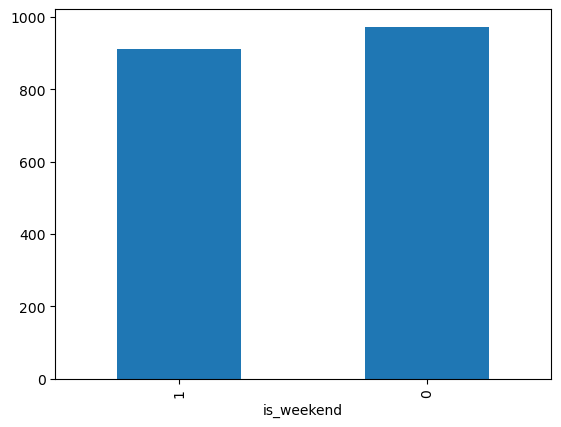

In [66]:
gp=df_train.groupby(["is_weekend"])["trip_duration"].mean()
gp.sort_values().plot(kind="bar")  # in weekends however 1 has 285775 and 0 has 714225 but equally in mean so in weekends the trips take long time

In [68]:
gp=df_train.groupby(["pickup_minute"])["trip_duration"].sum()
gp.sort_values()

pickup_minute
24    14941816
58    14994296
49    15010659
56    15032934
23    15151294
59    15286711
31    15306331
52    15336365
51    15337873
57    15374094
33    15491074
22    15499109
5     15501849
10    15543332
42    15546264
35    15604431
34    15643860
27    15684390
45    15694271
16    15701059
55    15721131
28    15729138
39    15753675
1     15761512
29    15781432
0     15791310
53    15799306
11    15842967
47    15858520
44    15901266
8     15964147
21    15964241
19    15971450
41    15972632
15    15982538
54    16020438
4     16032081
32    16049624
20    16050423
50    16061470
26    16091889
43    16106706
18    16107709
37    16139458
17    16156562
38    16204919
30    16228103
12    16327746
36    16333623
25    16344885
13    16360595
7     16366760
6     16438326
48    16453202
3     16460255
2     16508845
9     16525230
46    16733967
40    17229759
14    18075119
Name: trip_duration, dtype: int64

In [78]:
def range_minutes(x): 
    if 1<=x<=15 : 
        return 0   #Q1
    elif 16<=x<=30: 
        return 1   #Q2
    elif 31<=x<=45:
        return 2   #Q3
    else: 
        return 3   #Q4

In [79]:
df_train["range_minutes"]=df_train["pickup_minute"].apply(lambda x:range_minutes(x))

In [80]:
gp=df_train.groupby(["range_minutes"])["trip_duration"].sum()
gp.sort_values()  #almost no difference 

range_minutes
3    234812276
1    237403500
2    238977893
0    243691302
Name: trip_duration, dtype: int64

In [81]:
gp=df_train.groupby(["range_minutes"])["trip_duration"].mean()
gp.sort_values()

range_minutes
3    931.543377
2    954.990961
1    955.384523
0    977.890546
Name: trip_duration, dtype: float64

In [82]:
def range_hours(x): 
    if 5<=x<12 : 
        return 0  # Morning
    elif 12<=x<17: 
        return 1  # Afternoon
    else: 
        return 2  # Night


In [83]:
df_train["range_hours"]=df_train["pickup_hour"].apply(lambda x:range_hours(x))

In [86]:
gp=df_train.groupby(["range_hours"])["trip_duration"].sum()
gp.sort_values()

range_hours
0    232407054
1    257883919
2    464593998
Name: trip_duration, dtype: int64

In [85]:
gp=df_train.groupby(["range_hours"])["trip_duration"].mean()
gp.sort_values()

range_hours
0     909.232317
2     925.753451
1    1063.276609
Name: trip_duration, dtype: float64

In [87]:
def range_months(x): 
    if 1<=x<=2 : 
        return 0  # winter
    elif 3<=x<=5: 
        return 1  # spring 
    else:  
        return 2  # summer      #we know that data for 6 months from 1 to 6


In [88]:
df_train["range_months"]=df_train["pickup_month"].apply(lambda x:range_months(x))

In [91]:
gp=df_train.groupby(["range_months"])["trip_duration"].sum()
gp.sort_values()

range_months
2    162654388
0    291515263
1    500715320
Name: trip_duration, dtype: int64

In [90]:
gp=df_train.groupby(["range_months"])["trip_duration"].mean()
gp.sort_values()

range_months
0     907.158124
1     966.150682
2    1014.105367
Name: trip_duration, dtype: float64

# let's investigate some distance features 

In [94]:
from geopy import distance
from geopy.point import Point
import math

In [95]:
def haversine_distance(row):
    pick = Point(row['pickup_latitude'], row['pickup_longitude'])
    drop = Point(row['dropoff_latitude'], row['dropoff_longitude'])
    dist = distance.geodesic(pick, drop)
    return dist.km

In [96]:
def calculate_direction(row):
    pickup_coordinates =  Point(row['pickup_latitude'], row['pickup_longitude'])
    dropoff_coordinates = Point(row['dropoff_latitude'], row['dropoff_longitude'])
    # Calculate the difference in longitudes
    delta_longitude = dropoff_coordinates[1] - pickup_coordinates[1]
    # Calculate the bearing (direction) using trigonometry
    y = math.sin(math.radians(delta_longitude)) * math.cos(math.radians(dropoff_coordinates[0]))
    x = math.cos(math.radians(pickup_coordinates[0])) * math.sin(math.radians(dropoff_coordinates[0])) - \
        math.sin(math.radians(pickup_coordinates[0])) * math.cos(math.radians(dropoff_coordinates[0])) * \
        math.cos(math.radians(delta_longitude))
    # Calculate the bearing in degrees
    bearing = math.atan2(y, x)
    bearing = math.degrees(bearing)
    # Adjust the bearing to be in the range [0, 360)
    bearing = (bearing + 360) % 360
    
    return bearing

In [97]:
def manhattan_distance(row):
   
    lat_distance = abs(row['pickup_latitude'] - row['dropoff_latitude']) * 111  # approx 111 km per degree latitude
    lon_distance = abs(row['pickup_longitude'] - row['dropoff_longitude']) * 111 * math.cos(math.radians(row['pickup_latitude']))  # adjust for latitude
    
    return lat_distance + lon_distance

In [98]:
df_train['distance_haversine'] = df_train.apply(haversine_distance, axis=1)
df_train['direction'] =   df_train.apply(calculate_direction, axis=1)
df_train['distance_manhattan'] = df_train.apply(manhattan_distance, axis=1)


In [101]:
df_train['distance_haversine'].describe()

count    1000000.000000
mean           3.440429
std            4.428006
min            0.000000
25%            1.232421
50%            2.091711
75%            3.870799
max         1240.510256
Name: distance_haversine, dtype: float64

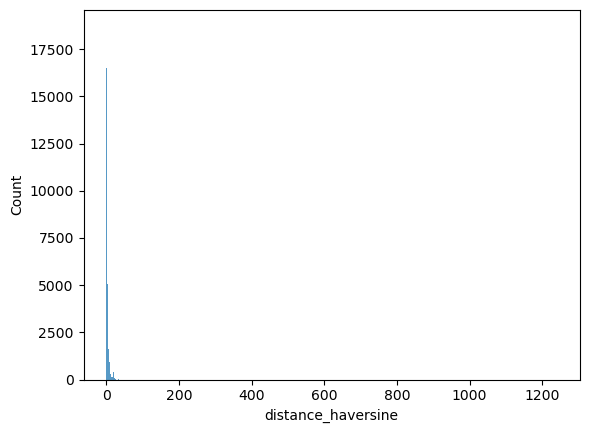

In [100]:
sns.histplot(df_train['distance_haversine'])
plt.show()

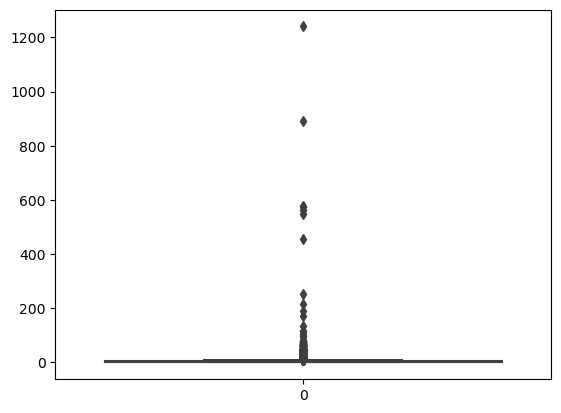

In [102]:
sns.boxplot(df_train['distance_haversine'])
plt.show()  # see the outliers 

In [106]:
f=df_train['distance_haversine']>20
df_train[f]

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,pickup_month,pickup_day,pickup_dayofweek,pickup_minute,log_trip_duration,is_weekend,range_minutes,range_hours,range_months,distance_haversine,direction,distance_manhattan
4,id0140657,1,2016-05-12 17:43:38,4,-73.789497,40.646675,-73.987137,40.759232,N,4967,17,5,12,Thursday,43,8.510773,0,2,2,1,20.861805,306.979191,29.139010
12,id0088775,2,2016-04-14 18:29:44,1,-73.776665,40.645432,-73.968163,40.754810,N,2971,18,4,14,Thursday,29,7.996990,0,1,2,1,20.235383,307.056678,28.269340
21,id0874642,2,2016-06-10 01:45:44,1,-73.975868,40.746498,-73.699997,40.795990,N,1748,1,6,10,Friday,45,7.466799,0,2,2,2,23.930219,76.582828,28.692757
62,id1106419,2,2016-05-31 10:49:14,1,-73.781944,40.644691,-73.967003,40.798595,N,2980,10,5,31,Tuesday,49,8.000014,0,3,0,1,23.163689,317.717216,32.669482
90,id3475936,2,2016-01-03 17:30:18,6,-73.977119,40.764389,-73.784363,40.643372,N,2877,17,1,3,Sunday,30,7.964851,1,1,2,0,21.117850,129.567538,29.638281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999737,id3163537,2,2016-01-29 13:42:10,1,-73.781898,40.644650,-73.996422,40.732609,N,2609,13,1,29,Friday,42,7.867106,0,2,1,0,20.596990,298.471675,27.831235
999894,id0328398,1,2016-01-21 08:58:02,1,-73.997604,40.756657,-73.789085,40.641670,N,3308,8,1,21,Thursday,58,8.104401,0,3,0,0,21.763007,125.962618,30.296039
999929,id2898997,2,2016-04-05 22:16:15,2,-73.776741,40.645378,-73.963425,40.765919,N,1882,22,4,5,Tuesday,16,7.540622,0,1,2,1,20.689912,310.483909,29.102857
999974,id3977682,2,2016-01-07 23:38:32,4,-73.971069,40.758549,-73.734138,40.772141,N,2605,23,1,7,Thursday,38,7.865572,0,2,2,0,20.061604,85.591247,21.429571


In [108]:
df_train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'pickup_hour', 'pickup_month', 'pickup_day', 'pickup_dayofweek',
       'pickup_minute', 'log_trip_duration', 'is_weekend', 'range_minutes',
       'range_hours', 'range_months', 'distance_haversine', 'direction',
       'distance_manhattan'],
      dtype='object')

In [113]:
df_train_corr=df_train[['vendor_id','passenger_count','pickup_hour', 'pickup_month', 'pickup_day','pickup_minute', 'log_trip_duration', 'is_weekend', 'range_minutes','range_hours', 'range_months', 'distance_haversine', 'direction','distance_manhattan']]

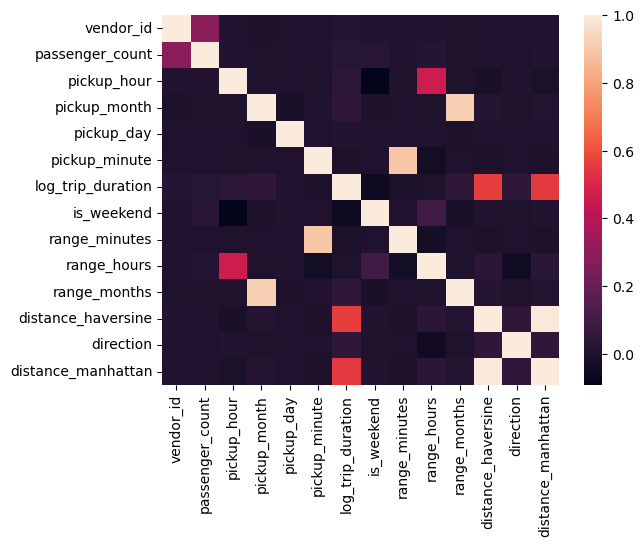

In [116]:
sns.heatmap(df_train_corr.corr())
plt.show()

# End of EDA

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime

from geopy import distance
from geopy.point import Point
import math

from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler, PolynomialFeatures, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,mean_squared_error
import xgboost as xgb

In [2]:
df_train =pd.read_csv(r"D:\Courses\ML Dr Mostafa\Projects_last\1 project-nyc-taxi-trip-duration\split\train.csv")
df_val =pd.read_csv(r"D:\Courses\ML Dr Mostafa\Projects_last\1 project-nyc-taxi-trip-duration\split\val.csv")
df_test=pd.read_csv(r"D:\Courses\ML Dr Mostafa\Projects_last\1 project-nyc-taxi-trip-duration\split\test.csv")
pd.set_option("display.max_columns",50)

# i will prepare the data without removing anything (outliers)

In [3]:
def prepare_data(df):

    def range_months(x): 
        if 1<=x<=2 : 
            return 0  # winter
        elif 3<=x<=5: 
            return 1  # spring 
        else:  
            return 2  # summer      #we know that data for 6 months from 1 to 6

    def range_hours(x): 
        if 5<=x<12 : 
            return 0  # Morning
        elif 12<=x<17: 
            return 1  # Afternoon
        else: 
            return 2  # Night

    def range_minutes(x): 
        if 1<=x<=15 : 
            return 0   #Q1
        elif 16<=x<=30: 
            return 1   #Q2
        elif 31<=x<=45:
            return 2   #Q3
        else: 
            return 3   #Q4

    def haversine_distance(row):
        pick = Point(row['pickup_latitude'], row['pickup_longitude'])
        drop = Point(row['dropoff_latitude'], row['dropoff_longitude'])
        dist = distance.geodesic(pick, drop)
        return dist.km

    def calculate_direction(row):
        pickup_coordinates =  Point(row['pickup_latitude'], row['pickup_longitude'])
        dropoff_coordinates = Point(row['dropoff_latitude'], row['dropoff_longitude'])
        # Calculate the difference in longitudes
        delta_longitude = dropoff_coordinates[1] - pickup_coordinates[1]
        # Calculate the bearing (direction) using trigonometry
        y = math.sin(math.radians(delta_longitude)) * math.cos(math.radians(dropoff_coordinates[0]))
        x = math.cos(math.radians(pickup_coordinates[0])) * math.sin(math.radians(dropoff_coordinates[0])) - \
            math.sin(math.radians(pickup_coordinates[0])) * math.cos(math.radians(dropoff_coordinates[0])) * \
            math.cos(math.radians(delta_longitude))
        # Calculate the bearing in degrees
        bearing = math.atan2(y, x)
        bearing = math.degrees(bearing)
        # Adjust the bearing to be in the range [0, 360)
        bearing = (bearing + 360) % 360
        
        return bearing

    def manhattan_distance(row):
       
        lat_distance = abs(row['pickup_latitude'] - row['dropoff_latitude']) * 111  # approx 111 km per degree latitude
        lon_distance = abs(row['pickup_longitude'] - row['dropoff_longitude']) * 111 * math.cos(math.radians(row['pickup_latitude']))  # adjust for latitude
        
        return lat_distance + lon_distance
    
    # datetime
    df["pickup_datetime"]=pd.to_datetime(df["pickup_datetime"])
    df["pickup_hour"]=df["pickup_datetime"].dt.hour
    df["pickup_month"]=df["pickup_datetime"].dt.month
    df["pickup_day"]=df["pickup_datetime"].dt.day
    df["pickup_dayofweek"]=df["pickup_datetime"].dt.day_name()
    df["pickup_minute"]=df["pickup_datetime"].dt.minute

    df["log_trip_duration"]=np.log1p(df["trip_duration"])
    
    df["is_weekend"]=((df["pickup_dayofweek"]=="Sunday") | (df["pickup_dayofweek"]=="Saturday")).astype(int)
    df["range_minutes"]=df["pickup_minute"].apply(lambda x:range_minutes(x))
    df["range_hours"]=df["pickup_hour"].apply(lambda x:range_hours(x))
    df["range_months"]=df["pickup_month"].apply(lambda x:range_months(x))

    df['distance_haversine'] = df.apply(haversine_distance, axis=1)
    df['direction'] = df.apply(calculate_direction, axis=1)
    df['distance_manhattan'] = df.apply(manhattan_distance, axis=1)

    df.drop(columns=['id','pickup_datetime','trip_duration','pickup_minute'],inplace=True)

    return df 
    

In [4]:
df_train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration'],
      dtype='object')

In [5]:
cat_features=['vendor_id', 'passenger_count','store_and_fwd_flag','pickup_hour', 'pickup_month', 'pickup_day', 'pickup_dayofweek', 'is_weekend', 'range_minutes','range_hours', 'range_months']
num_features =[ 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude','dropoff_latitude','distance_haversine', 'direction','distance_manhattan']

In [12]:
def predict_eval(model, data_preprocessed, target,name) -> str:
    y_train_pred = model.predict(data_preprocessed)
    mse = mean_squared_error(target, y_train_pred)
    rmse=mse**.5
    r2 = r2_score(target, y_train_pred)
    print(f"{name} RMSE = {rmse:.4f} - R2 = {r2:.4f}")
    return rmse, r2, f"{name} RMSE = {rmse:.4f} - R2 = {r2:.4f}"


In [13]:
def log_transform(x): 
    return np.log1p(np.maximum(x, 0))

def with_suffix(_, names: list[str]):  # https://github.com/scikit-learn/scikit-learn/issues/27695
    return [name + '__log' for name in names]

In [16]:
def pipeline_train(train, val):

    cat_features=['vendor_id', 'passenger_count','store_and_fwd_flag','pickup_hour', 'pickup_month', 'pickup_day', 'pickup_dayofweek', 'is_weekend', 'range_minutes','range_hours', 'range_months']
    num_features =[ 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude','dropoff_latitude','distance_haversine', 'direction','distance_manhattan']
    
    LogFeatures = FunctionTransformer(log_transform, feature_names_out=with_suffix)
    
    train_features = num_features + cat_features

    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler()), 
        ('poly', PolynomialFeatures(degree=4)),
        ('log', LogFeatures)
       
    ])

    categorical_transformer = Pipeline(steps=[
        ('ohe', OneHotEncoder(handle_unknown="infrequent_if_exist"))
    ])

    column_transformer = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, num_features ),
            ('cat', categorical_transformer, cat_features)
        ],
        remainder='passthrough'
    )

    data_preprocessor = Pipeline(steps=[
        ('preprocessor', column_transformer)
    ])

   
    train_preprocessed = data_preprocessor.fit_transform(train[train_features])
    val_preprocessed = data_preprocessor.transform(val[train_features])



    ridge = Ridge(alpha=1, random_state=42)
    ridge.fit(train_preprocessed, train['log_trip_duration'])

    
    xgbr=xgb.XGBRegressor()
    xgbr.fit(train_preprocessed, train['log_trip_duration'])
    
    train_rmse_ridge, train_r2_ridge, _ = predict_eval(ridge, train_preprocessed, train['log_trip_duration'], "train_ridge")
    val_rmse_ridge, val_r2_ridge, _ = predict_eval(ridge, val_preprocessed, val['log_trip_duration'], "val_ridge")
    
    train_rmse_xgbr, train_r2_xgbr, _ = predict_eval(xgbr, train_preprocessed, train['log_trip_duration'], "train_xgbr")
    val_rmse_xgbr, val_r2_xgbr, _ = predict_eval(xgbr, val_preprocessed, val['log_trip_duration'], "val_xgbr")
    
    return ridge,xgbr, train_features, data_preprocessor, train_rmse_ridge, train_r2_ridge, val_rmse_ridge, val_r2_ridge,train_rmse_xgbr, train_r2_xgbr,val_rmse_xgbr, val_r2_xgbr


In [9]:
df_train=prepare_data(df_train)
df_val=prepare_data(df_val)


In [17]:
ridge,xgbr, train_features, data_preprocessor, train_rmse_ridge, train_r2_ridge, val_rmse_ridge, val_r2_ridge,train_rmse_xgbr, train_r2_xgbr,val_rmse_xgbr, val_r2_xgbr = pipeline_train(df_train, df_val)


train_ridge RMSE = 0.4432 - R2 = 0.6891
val_ridge RMSE = 0.4478 - R2 = 0.6867
train_xgbr RMSE = 0.3826 - R2 = 0.7683
val_xgbr RMSE = 0.4012 - R2 = 0.7485


In [18]:
df_test=prepare_data(df_test)

In [25]:
test_preprocessed=data_preprocessor.transform(df_test[train_features])

In [27]:
test_rmse_ridge, test_r2_ridge, _ = predict_eval(ridge, test_preprocessed, df_test['log_trip_duration'], "test_ridge")
test_rmse_xgbr, test_r2_xgbr, _ = predict_eval(xgbr, test_preprocessed, df_test['log_trip_duration'], "test_xgbr")


test_ridge RMSE = 0.4426 - R2 = 0.6908
test_xgbr RMSE = 0.3952 - R2 = 0.7534


In [29]:
test_preprocessed.shape

(229322, 422)